Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions import calculate_t_half, simulate


Comparison of effector concentration for different L values

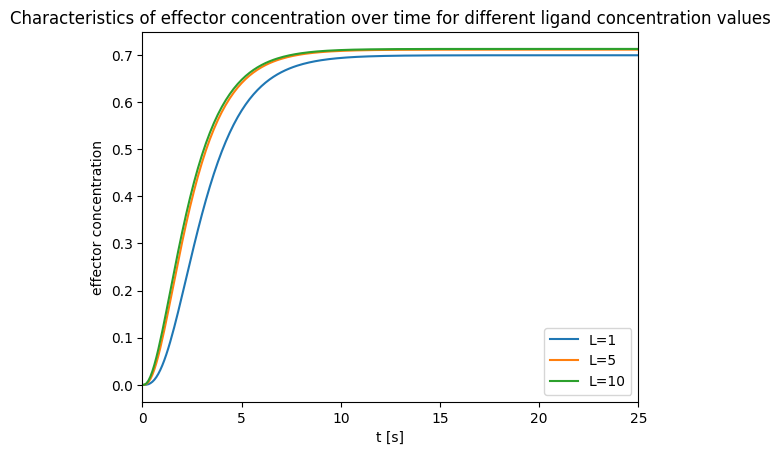

In [2]:
for L in [1, 5, 10]:
    t, R, K, E = simulate(L)
    plt.plot(t, E, label=f"L={L}")
plt.xlabel("t [s]")
plt.xlim(0, 25)
plt.ylabel("effector concentration")
plt.title("Characteristics of effector concentration over time for different ligand concentration values")
plt.legend()
plt.show()

Comparison of effector concentration for different values of k_cat

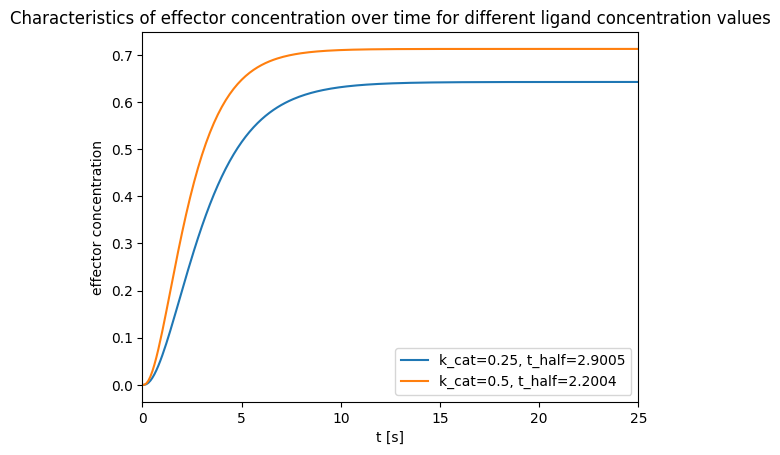

In [3]:
L = 10
for k in [0.25, 0.5]:
    t, R, K, E = simulate(L, k_cat=k)
    t_half = calculate_t_half(E, t)
    plt.plot(t, E, label=f"k_cat={k}, t_half={t_half:.4f}")

plt.xlabel("t [s]")
plt.xlim(0, 25)
plt.ylabel("effector concentration")
plt.title("Characteristics of effector concentration over time for different ligand concentration values")
plt.legend()
plt.show()

Finding k_cat and k_off values that match t_half = 120

In [14]:
L = 10
target_t_half = 120.0

best_t_half = -1.0
best_k_cat = -1.0
best_k_off = -1.0
min_diff = np.inf

for k_cat in np.linspace(0.0005, 0.02, 10):
    for k_off in np.linspace(1.0, 20.0, 10):
        t, R, K, E = simulate(L, k_cat=k_cat, k_off=k_off, kdegE=0.001)
        t_half = calculate_t_half(E, t)
        if (diff:=abs(t_half - target_t_half)) < min_diff:
            min_diff = diff
            best_t_half = t_half
            best_k_cat = k_cat
            best_k_off = k_off

print(f"{best_t_half=}")
print(f"{best_k_cat=}")
print(f"{best_k_off=}")


best_t_half=np.float64(120.2200366727788)
best_k_cat=np.float64(0.0026666666666666666)
best_k_off=np.float64(5.222222222222222)


Control questions:
1. Why can an increase in koff prolong the activation time of the effector?
Because the weaker signal from R is transmitted more slowly to K and E, the entire process of effector activation is prolonged.
2. Does an increase in L always shorten t1/2? Explain what else can influence this relationship.
In the mathematical model, increasing L causes t1/2 to decrease, but in the real system, L can become saturated.
